In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def print_image(index):
    some_digit = data.iloc[index,1:].values
    some_digit_img = some_digit.reshape(28,28)
    plt.imshow(some_digit_img,'binary')

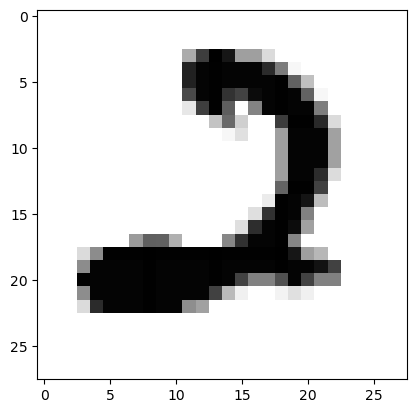

In [4]:
print_image(1903)

In [5]:
# seperating faetues and target column
x = data.drop('label', axis=1)
print("features shape: ", x.shape)
y = data.label
print("Target shape: ", y.shape)

features shape:  (42000, 784)
Target shape:  (42000,)


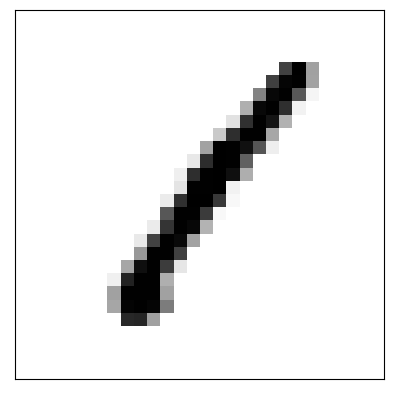

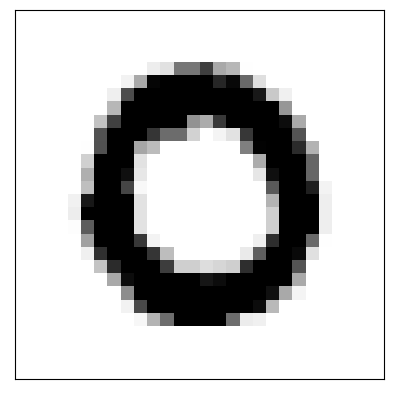

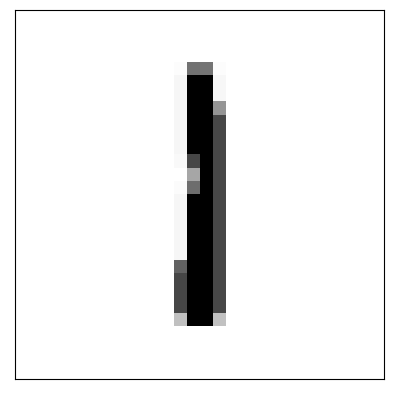

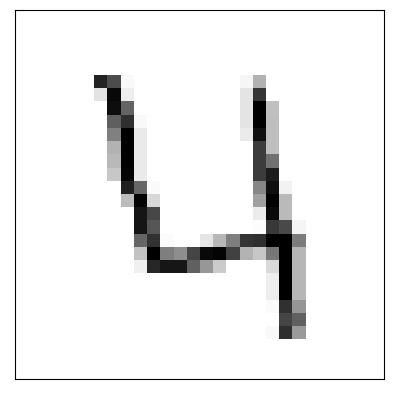

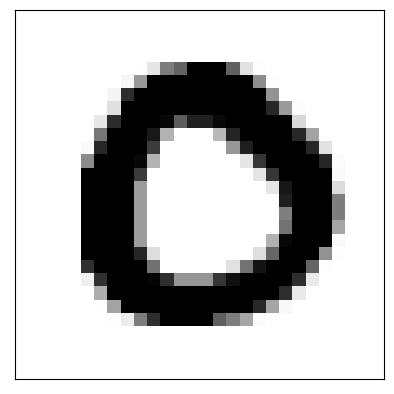

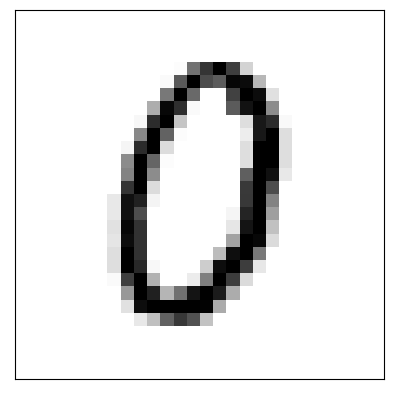

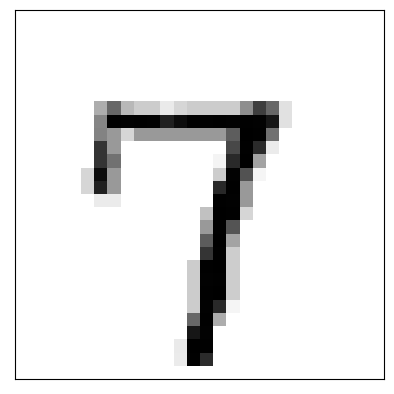

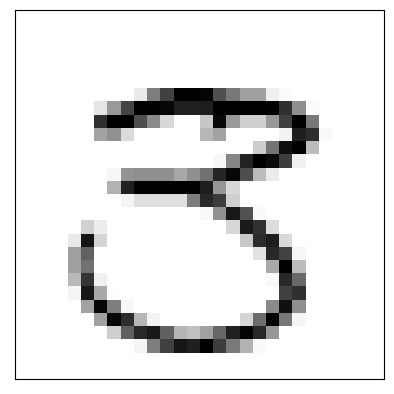

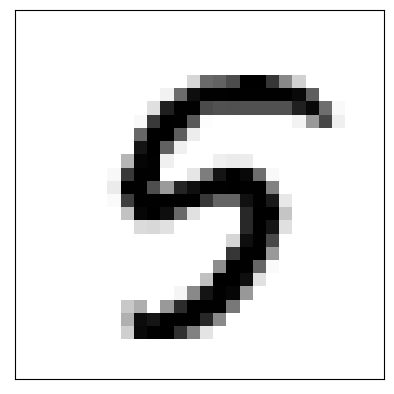

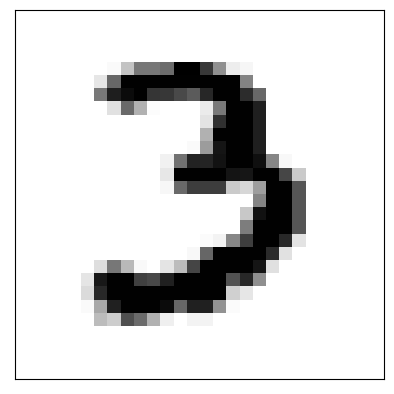

In [6]:
for i in range(10):
    #plt.subplot(5,4, i+1)
    plt.xticks([])
    plt.yticks([])
    print_image(i)
    #plt.xlabel('label:{}'.format(y[i]))
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [8]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (29400, 784)
Shape of y_train: (29400,)
Shape of X_test: (12600, 784)
Shape of y_test: (12600,)


In [9]:
#DECISION TREE

dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train) 

In [10]:
y_pred_test_dtf = dt.predict(X_test)
y_pred_train_dtf = dt.predict(X_train)

In [11]:
y_pred_test_dtf

array([4, 1, 9, ..., 5, 5, 0], dtype=int64)

In [12]:
y_pred_train_dtf

array([4, 0, 9, ..., 2, 6, 0], dtype=int64)

In [13]:
print ("Accuracy on Training Data", dt.score(X_train, y_train))
print ("Accuracy on Test Data", dt.score(X_test, y_test))

Accuracy on Training Data 1.0
Accuracy on Test Data 0.8442857142857143


In [14]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_test_dtf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_dtf))

Confusion Matrix: 
[[1081    4   19    6   14   25   21    5   16    9]
 [   1 1307   17   14    9    6    9    4   17    5]
 [  21   20 1045   50   20   15   21   43   45   14]
 [  16   18   45 1064   11   77    6   26   56   36]
 [   4    7   12   24 1043   14   16   15   30   57]
 [  12   16   11   84   20  844   36   11   32   19]
 [  23    4   21   13   27   30 1109    3   19    7]
 [  10   11   33   21   13   15    0 1206   10   40]
 [  15   29   42   55   37   37   24    7  936   27]
 [  12    4    9   24   54   20    6   47   52 1003]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1200
           1       0.92      0.94      0.93      1389
           2       0.83      0.81      0.82      1294
           3       0.79      0.79      0.79      1355
           4       0.84      0.85      0.84      1222
           5       0.78      0.78      0.78      1085
           6       0.89      0.88      0.89    

In [15]:
#RANDOM FOREST

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
train_pred_rf = rf.predict(X_train)
pred_rf = rf.predict(X_test)

In [17]:
print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.9618253968253968


In [18]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, pred_rf))

Confusion Matrix: 
[[1185    0    2    2    1    1    5    0    3    1]
 [   0 1376    5    2    1    2    2    0    0    1]
 [   5    3 1245    6    8    2    5   11    9    0]
 [   4    1   16 1264    1   18    1   17   18   15]
 [   2    0    2    0 1183    0    7    1    3   24]
 [   5    2    1   18    1 1032   11    1    5    9]
 [   9    2    2    0    4    8 1224    0    7    0]
 [   1    7   14    2    8    0    0 1298    3   26]
 [   2    6    3   13    3   11    6    3 1149   13]
 [   6    3    3   18   12    5    3   11    7 1163]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1200
           1       0.98      0.99      0.99      1389
           2       0.96      0.96      0.96      1294
           3       0.95      0.93      0.94      1355
           4       0.97      0.97      0.97      1222
           5       0.96      0.95      0.95      1085
           6       0.97      0.97      0.97    

In [19]:
print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.9618253968253968


In [22]:
#NAVIE BAYES
nb = GaussianNB()
nb = nb.fit(X_train, y_train)

In [23]:
y_prednb_test = nb.predict(X_test)
y_prednb_train = nb.predict(X_train)

In [24]:
y_prednb_test

array([1, 1, 9, ..., 8, 8, 0], dtype=int64)

In [25]:
y_prednb_train

array([9, 0, 9, ..., 6, 6, 0], dtype=int64)

In [26]:
print ("Accuracy on Training Data", nb.score(X_train, y_train))
print ("Accuracy on Test Data", nb.score(X_test, y_test))

Accuracy on Training Data 0.5663605442176871
Accuracy on Test Data 0.5614285714285714


In [27]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_prednb_test))

print("\nClassification Report:")
print(classification_report(y_test, y_prednb_test))

Confusion Matrix: 
[[1095    1    4    5    0    5   49    1   23   17]
 [   1 1326    5    5    1    2   13    0   23   13]
 [ 157   46  372  106    5    6  334    6  248   14]
 [ 120  107    9  498    2    7   89   10  394  119]
 [  38   17   12    6  189   13  136    5  212  594]
 [ 161   36    7   25    5   96   86    2  561  106]
 [  14   25    3    1    0    6 1190    0   14    3]
 [   7   16    2   20   16    2    1  461   36  798]
 [  23  209    6   11    3    9   25    2  703  218]
 [  11   21    4    1    6    3    2   21   18 1144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1200
           1       0.74      0.95      0.83      1389
           2       0.88      0.29      0.43      1294
           3       0.73      0.37      0.49      1355
           4       0.83      0.15      0.26      1222
           5       0.64      0.09      0.16      1085
           6       0.62      0.95      0.75    

In [29]:
data_test = pd.read_csv('test.csv')
data_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
def print_testimage(index):
    some_digit = data_test.iloc[index].values
    some_digit_img = some_digit.reshape(28,28)
    plt.imshow(some_digit_img,'binary')

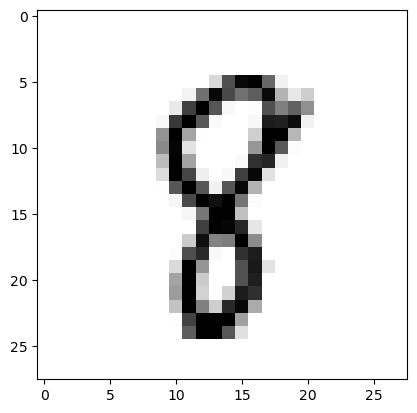

In [34]:
print_testimage(440)

In [35]:
testdata2 = dt.predict(data_test)
testdata2

array([2, 2, 9, ..., 3, 9, 2], dtype=int64)

In [36]:
testdata3 = nb.predict(data_test)
testdata3

array([0, 0, 9, ..., 8, 9, 0], dtype=int64)

In [37]:
testdata4 = rf.predict(data_test)
testdata4

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

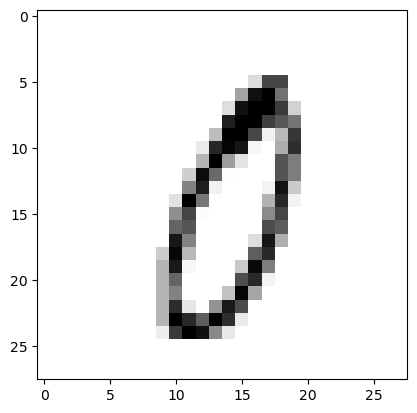

In [38]:
print_testimage(1997)

In [39]:
# DecisionTree
testdata2[1997]

0

In [40]:
# Naive Bayes
testdata3[1997]

9

In [41]:
# RandomForest
testdata4[1997]

0

In [42]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),)

NameError: name 'model' is not defined